In [37]:
# PCA with sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# import and prepare data
# df = pd.read_csv("./mnist.csv",header=None)
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mnist_012.csv')

df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X = df.drop(['0'], axis=1)
Y = df.loc[:,'0']
print(X.shape)
X.head()
Y.head()

(3147, 784)


0    2
1    1
2    0
3    1
4    0
Name: 0, dtype: int64

In [39]:
pca =PCA()
df_pca = pca.fit_transform(X=X)

df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)
df_pca.round(2).head()

(3147, 784)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-134.27,107.74,-544.92,313.08,-500.13,163.35,-223.05,-460.86,1016.40,206.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
1,-970.42,-371.82,114.48,-339.01,-53.98,-106.12,19.83,-443.88,-220.42,69.63,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
2,1267.53,-263.23,-35.69,612.76,-734.47,267.74,363.05,-130.85,-160.31,-353.75,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
3,-1066.12,-239.33,137.99,-424.37,-174.55,209.85,57.16,-316.86,-325.03,148.86,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
4,1037.18,-427.39,-700.74,-566.28,134.67,-584.41,-546.83,-70.67,52.58,306.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0


In [40]:
# Principal Components Weights (Eigenvectors)
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-1.789862e-19,4.163336e-17,-1.110223e-16,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,3.291300e-19,-1.387779e-17,-2.775558e-17,8.326673e-17,-1.665335e-16,-1.110223e-16,-0.000000e+00,-1.387779e-17,-0.000000e+00,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,-2.690999e-18,2.220446e-16,-5.551115e-17,1.110223e-16,-0.000000e+00,-1.387779e-16,1.110223e-16,-1.110223e-16,2.775558e-17,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,1.677635e-18,-2.775558e-17,-2.775558e-17,-2.775558e-17,1.110223e-16,2.775558e-17,-4.163336e-17,-1.387779e-16,5.551115e-17,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,-3.410215e-18,1.110223e-16,-0.000000e+00,1.387779e-16,2.775558e-17,1.110223e-16,-1.665335e-16,1.110223e-16,1.387779e-17,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [43]:
X_mean = X - X.mean()
X_mean.head()
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[0, :])

-134.27241070066756

[0.22 0.1  0.06 0.06 0.04 0.04 0.03 0.03 0.02 0.02]


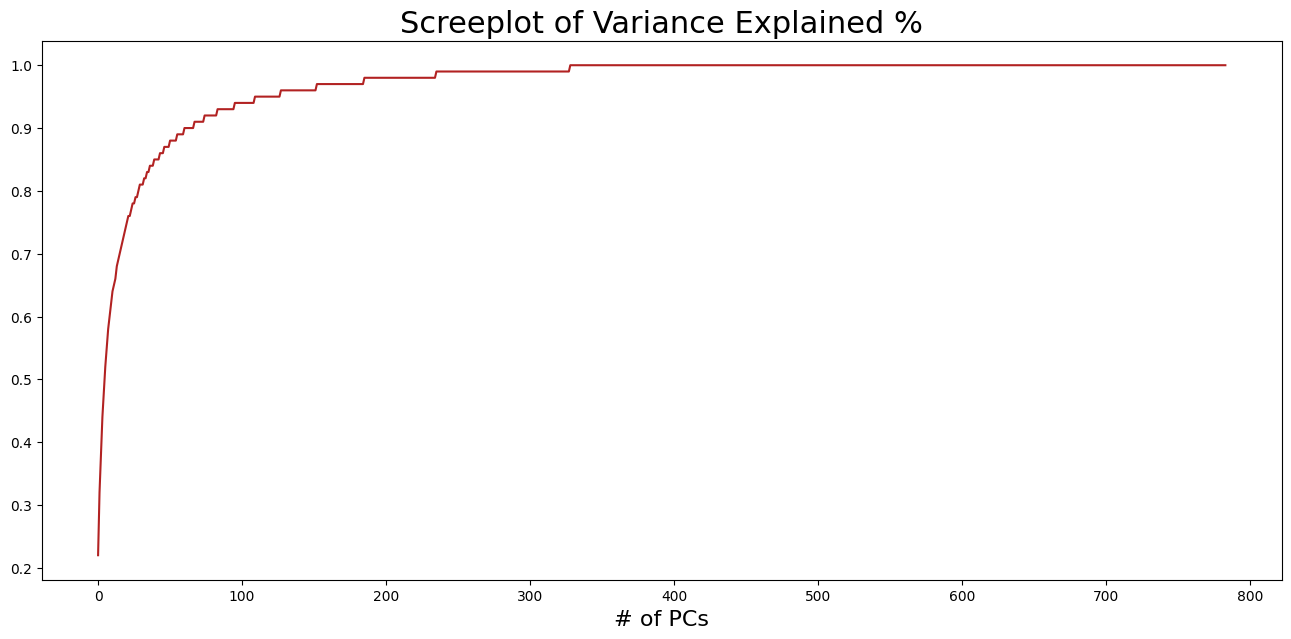

In [42]:
print(pca.explained_variance_ratio_.round(2)[:10])
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()